<a href="https://colab.research.google.com/github/SaraRapalino/TelecomX/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [374]:
import pandas as pd
import requests

pd.set_option('display.max_rows', 100)

url = "https://raw.githubusercontent.com/SaraRapalino/TelecomX/main/TelecomX_Data.json"

response = requests.get(url)
data = response.json()

df = pd.json_normalize(data)

df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

**Conoce el conjunto de datos**




In [375]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [376]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [377]:
df.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [378]:
df.describe(include='all')


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
count,7267,7267,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267,7267.000000,7267
unique,7267,3,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,3,2,4,NaN,6531
top,9995-HOTOH,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2
freq,1,5174,3675,NaN,3749,5086,NaN,6560,3495,3198,...,3182,3195,3582,2896,2870,4005,4311,2445,NaN,11
mean,NaN,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,NaN
std,NaN,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,NaN
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,NaN


In [379]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [380]:
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

print("Categóricas:", categorical_cols)
print("Numéricas:", numerical_cols)


Categóricas: Index(['customerID', 'Churn', 'customer.gender', 'customer.Partner',
       'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines',
       'internet.InternetService', 'internet.OnlineSecurity',
       'internet.OnlineBackup', 'internet.DeviceProtection',
       'internet.TechSupport', 'internet.StreamingTV',
       'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Total'],
      dtype='object')
Numéricas: Index(['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly'], dtype='object')


**Comprobación de incoherencias en los datos**

In [381]:
df.isnull().sum()


,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [382]:
(df.isnull().sum() / len(df)) * 100


,0
customerID,0.0
Churn,0.0
customer.gender,0.0
customer.SeniorCitizen,0.0
customer.Partner,0.0
customer.Dependents,0.0
customer.tenure,0.0
phone.PhoneService,0.0
phone.MultipleLines,0.0
internet.InternetService,0.0


In [383]:
df.nunique().sort_values()


,0
customer.SeniorCitizen,2
customer.gender,2
customer.Dependents,2
customer.Partner,2
phone.PhoneService,2
account.PaperlessBilling,2
internet.InternetService,3
Churn,3
internet.DeviceProtection,3
internet.TechSupport,3


In [384]:
df['account.Charges.Total'].unique()[:10]


array(['593.3', '542.4', '280.85', '1237.85', '267.4', '571.45',
       '7904.25', '5377.8', '340.35', '5957.9'], dtype=object)

In [385]:
df.isnull().sum()


,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [386]:
df.duplicated().sum()

np.int64(0)

In [387]:
df = df.drop_duplicates()

In [388]:
df['customerID'].duplicated().sum()

np.int64(0)

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [390]:
df['account.Charges.Total'] = df['account.Charges.Total'].replace(" ", None)

df['account.Charges.Total'] = pd.to_numeric(
    df['account.Charges.Total'],
    errors='coerce'
)

In [391]:
df['account.Charges.Total'].isnull().sum()

np.int64(11)

In [392]:
df = df[df['account.Charges.Total'].notna()]

In [393]:
len(df)

7256

In [394]:
df[df['customerID'].duplicated(keep=False)].sort_values('customerID')

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total


In [395]:
for col in df.select_dtypes(include='object'):
    print(f"\nColumna: {col}")
    print(df[col].value_counts())


Columna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
             ..
0018-NYROU    1
0017-IUDMW    1
0017-DINOC    1
0016-QLJIS    1
0015-UOCOJ    1
Name: count, Length: 7256, dtype: int64

Columna: Churn
Churn
No     5163
Yes    1869
        224
Name: count, dtype: int64

Columna: customer.gender
customer.gender
Male      3669
Female    3587
Name: count, dtype: int64

Columna: customer.Partner
customer.Partner
No     3747
Yes    3509
Name: count, dtype: int64

Columna: customer.Dependents
customer.Dependents
No     5086
Yes    2170
Name: count, dtype: int64

Columna: phone.PhoneService
phone.PhoneService
Yes    6551
No      705
Name: count, dtype: int64

Columna: phone.MultipleLines
phone.MultipleLines
No                  3490
Yes                 3061
No phone service     705
Name: count, dtype: int64

Columna: internet.InternetService
internet.InternetService
Fiber optic    3198
DSL            2483
No             1575
Name: c

In [396]:
df[col] = df[col].str.strip()

In [397]:
df.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7256.0000,7256.000000,7256.000000,7256.000000
mean,0.1629,32.395535,64.755423,2280.634213
std,0.3693,24.558067,30.125739,2268.632997
min,0.0000,1.000000,18.250000,18.800000
25%,0.0000,9.000000,35.450000,400.225000
50%,0.0000,29.000000,70.300000,1391.000000
75%,0.0000,55.000000,89.900000,3785.300000
max,1.0000,72.000000,118.750000,8684.800000


In [398]:
df['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
No,71.154906
Yes,25.757993
,3.087100


**Manejo de inconsistencias**

In [399]:
df['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [400]:
df['Churn'] = df['Churn'].replace(" ", None)
df['Churn'] = df['Churn'].replace("", None)

In [401]:
df['Churn'].isnull().sum()

np.int64(224)

In [402]:
df['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
No,73.421502
Yes,26.578498


In [403]:
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.strip()

In [404]:
df['Churn'] = df['Churn'].replace("", None)
df['Churn'] = df['Churn'].replace(" ", None)

In [405]:
df['Churn'].isnull().sum()

np.int64(224)

In [406]:
df = df[df['Churn'].notna()]

In [407]:
df['account.Charges.Total'] = df['account.Charges.Total'].replace("", None)

df['account.Charges.Total'] = pd.to_numeric(
    df['account.Charges.Total'],
    errors='coerce'
)

In [408]:
df = df[df['account.Charges.Total'].notna()]

In [409]:
df['account.Charges.Total'].dtype

dtype('float64')

In [410]:
df = df.drop_duplicates(subset='customerID')

In [411]:
df['customerID'].nunique() == len(df)

True

In [412]:
df = df.replace("No phone service", "No")
df = df.replace("No internet service", "No")

In [413]:
print("Registros:", len(df))
print("\nNulos:\n", df.isnull().sum().sum())
print("\nDuplicados:", df.duplicated().sum())
print("\nDistribución Churn:\n", df['Churn'].value_counts(normalize=True)*100)

Registros: 7032

Nulos:
 0

Duplicados: 0

Distribución Churn:
 Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


**Columna de cuentas diarias**

In [414]:
# Mostrar las primeras filas para ver las columnas
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [415]:
df[['account.Charges.Total', 'customer.tenure']].dtypes

,0
account.Charges.Total,float64
customer.tenure,int64


In [416]:
# Verificar nulos
df[['account.Charges.Total', 'customer.tenure']].isnull().sum()

# Verificar si tenure = 0 (para evitar división por cero)
(df['customer.tenure'] == 0).sum()

np.int64(0)

In [417]:
df[['account.Charges.Total', 'customer.tenure']].describe()

,account.Charges.Total,customer.tenure
count,7032.000000,7032.000000
mean,2283.300441,32.421786
std,2266.771362,24.545260
min,18.800000,1.000000
25%,401.450000,9.000000
50%,1397.475000,29.000000
75%,3794.737500,55.000000
max,8684.800000,72.000000


In [418]:
# Crear columna Cuentas_Diarias: TotalCharges dividido por días activos
# Se asume 30 días por mes
df['Cuentas_Diarias'] = df.apply(
    lambda row: row['account.Charges.Total'] / (row['customer.tenure'] * 30)
    if row['customer.tenure'] > 0 else 0,
    axis=1
)

# Revisar las primeras filas
df[['customerID', 'customer.tenure', 'account.Charges.Total', 'Cuentas_Diarias']].head(10)


,customerID,customer.tenure,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,9,593.30,2.197407
1,0003-MKNFE,9,542.40,2.008889
2,0004-TLHLJ,4,280.85,2.340417
3,0011-IGKFF,13,1237.85,3.173974
4,0013-EXCHZ,3,267.40,2.971111
5,0013-MHZWF,9,571.45,2.116481
6,0013-SMEOE,71,7904.25,3.710915
7,0014-BMAQU,63,5377.80,2.845397
8,0015-UOCOJ,7,340.35,1.620714
9,0016-QLJIS,65,5957.90,3.055333


In [419]:
# Estadísticas básicas
df['Cuentas_Diarias'].describe()

# Verificar que no haya valores nulos
df['Cuentas_Diarias'].isnull().sum()

np.int64(0)

**Estandarización y transformación de datos**


In [420]:
# Diccionario de mapeo
binary_map = {'Yes': 1, 'No': 0}

# Aplicar a columnas binarias
binary_cols = ['Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling']

for col in binary_cols:
    df[col] = df[col].map(binary_map)

In [421]:
df.rename(columns={
    'customer.gender': 'Genero',
    'customer.Partner': 'Pareja',
    'customer.Dependents': 'Dependientes',
    'phone.PhoneService': 'ServicioTelefono',
    'phone.MultipleLines': 'LineasMultiples',
    'internet.InternetService': 'ServicioInternet',
    'internet.OnlineSecurity': 'SeguridadOnline',
    'internet.OnlineBackup': 'RespaldoOnline',
    'internet.DeviceProtection': 'ProteccionDispositivo',
    'internet.TechSupport': 'SoporteTecnico',
    'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingPeliculas',
    'account.Contract': 'Contrato',
    'account.PaperlessBilling': 'FacturacionSinPapel',
    'account.PaymentMethod': 'MetodoPago',
    'account.Charges.Total': 'TotalFacturado'
}, inplace=True)


In [422]:
df.replace("No phone service", "No", inplace=True)
df.replace("No internet service", "No", inplace=True)

In [423]:
contrato_map = {
    "Month-to-month": 0,
    "One year": 1,
    "Two year": 2
}

df['Contrato'] = df['Contrato'].map(contrato_map)

In [424]:
df['Genero'] = df['Genero'].map({'Male': 1, 'Female': 0})

In [425]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               7032 non-null   object 
 1   Churn                    7032 non-null   int64  
 2   Genero                   7032 non-null   int64  
 3   customer.SeniorCitizen   7032 non-null   int64  
 4   Pareja                   7032 non-null   int64  
 5   Dependientes             7032 non-null   int64  
 6   customer.tenure          7032 non-null   int64  
 7   ServicioTelefono         7032 non-null   int64  
 8   LineasMultiples          7032 non-null   object 
 9   ServicioInternet         7032 non-null   object 
 10  SeguridadOnline          7032 non-null   object 
 11  RespaldoOnline           7032 non-null   object 
 12  ProteccionDispositivo    7032 non-null   object 
 13  SoporteTecnico           7032 non-null   object 
 14  StreamingTV              7032

#📊 Carga y análisis

**Análisis Descriptivo**

In [426]:
# Estadísticas descriptivas básicas
df.describe()


,Churn,Genero,customer.SeniorCitizen,Pareja,Dependientes,customer.tenure,ServicioTelefono,Contrato,FacturacionSinPapel,account.Charges.Monthly,TotalFacturado,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.688567,0.592719,64.798208,2283.300441,2.159981
std,0.441782,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.832934,0.491363,30.085974,2266.771362,1.006196
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.459167
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,35.587500,401.450000,1.205996
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,70.350000,1397.475000,2.345775
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,3.005985
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,1.000000,118.750000,8684.800000,4.046667


In [427]:
# Frecuencia de cada categoría
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\nColumna: {col}")
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True) * 100)


Columna: customerID
customerID
9995-HOTOH    1
0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
             ..
0018-NYROU    1
0017-IUDMW    1
0017-DINOC    1
0016-QLJIS    1
0015-UOCOJ    1
Name: count, Length: 7032, dtype: int64
customerID
9995-HOTOH    0.014221
0002-ORFBO    0.014221
0003-MKNFE    0.014221
0004-TLHLJ    0.014221
0011-IGKFF    0.014221
                ...   
0018-NYROU    0.014221
0017-IUDMW    0.014221
0017-DINOC    0.014221
0016-QLJIS    0.014221
0015-UOCOJ    0.014221
Name: proportion, Length: 7032, dtype: float64

Columna: LineasMultiples
LineasMultiples
No     4065
Yes    2967
Name: count, dtype: int64
LineasMultiples
No     57.807167
Yes    42.192833
Name: proportion, dtype: float64

Columna: ServicioInternet
ServicioInternet
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64
ServicioInternet
Fiber optic    44.027304
DSL            34.357224
No             21.615472
Name: proportion, dtype: float64

Columna: S

In [428]:
numerical_cols = ['customer.tenure', 'TotalFacturado', 'Cuentas_Diarias']

for col in numerical_cols:
    print(f"\nColumna: {col}")
    print(f"Media: {df[col].mean():.2f}")
    print(f"Mediana: {df[col].median():.2f}")
    print(f"Desviación estándar: {df[col].std():.2f}")
    print(f"Valor mínimo: {df[col].min():.2f}")
    print(f"Valor máximo: {df[col].max():.2f}")



Columna: customer.tenure
Media: 32.42
Mediana: 29.00
Desviación estándar: 24.55
Valor mínimo: 1.00
Valor máximo: 72.00

Columna: TotalFacturado
Media: 2283.30
Mediana: 1397.47
Desviación estándar: 2266.77
Valor mínimo: 18.80
Valor máximo: 8684.80

Columna: Cuentas_Diarias
Media: 2.16
Mediana: 2.35
Desviación estándar: 1.01
Valor mínimo: 0.46
Valor máximo: 4.05


In [429]:
# Conteo de clientes por estado de churn
print(df['Churn'].value_counts())

# Porcentaje de churn
print(df['Churn'].value_counts(normalize=True) * 100)


Churn
0    5163
1    1869
Name: count, dtype: int64
Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


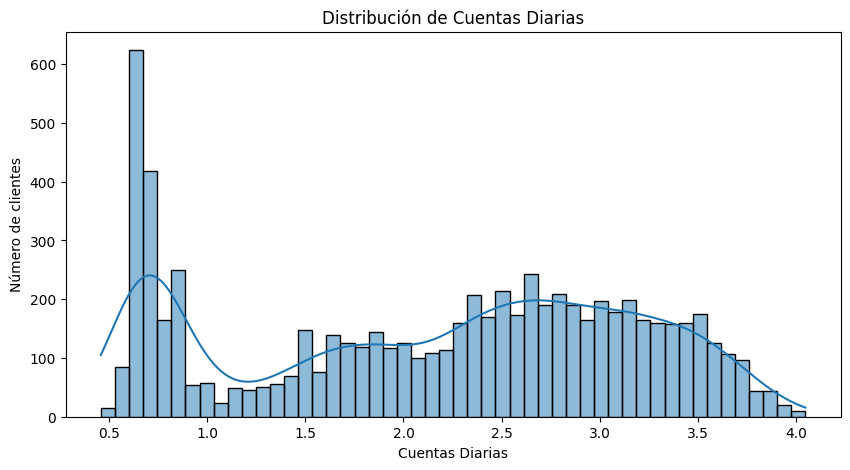

In [430]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(df['Cuentas_Diarias'], bins=50, kde=True)
plt.title("Distribución de Cuentas Diarias")
plt.xlabel("Cuentas Diarias")
plt.ylabel("Número de clientes")
plt.show()

**Distribución de evasión**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar clientes por estado de churn
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Distribución de Evasión de Clientes')
plt.xlabel('Churn (0=No, 1=Sí)')
plt.ylabel('Número de Clientes')
plt.xticks([0,1], ['No', 'Sí'])
plt.show()


In [ ]:
# Proporciones de churn
churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=['No', 'Sí'], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=90)
plt.title('Proporción de Clientes que Cancelaron vs. Permanecieron')
plt.show()

**Recuento de evasión por variables categóricas**

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Genero', hue='Churn', data=df, palette='Set1')
plt.title('Evasión por Género')
plt.xlabel('Género (0=Femenino, 1=Masculino)')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contrato', hue='Churn', data=df, palette='Set2')
plt.title('Evasión por Tipo de Contrato')
plt.xlabel('Contrato (0=Month-to-month, 1=One year, 2=Two year)')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='MetodoPago', hue='Churn', data=df, palette='Set3')
plt.title('Evasión por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='FacturacionSinPapel', hue='Churn', data=df, palette='Paired')
plt.title('Evasión según Facturación Sin Papel')
plt.xlabel('Facturación Sin Papel (0=No, 1=Sí)')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.show()

**Conteo de evasión por variables numéricas**

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Churn', y='TotalFacturado', data=df, palette='Set2')
plt.title('Distribución de Total Facturado por Churn')
plt.xlabel('Churn (0=No, 1=Sí)')
plt.ylabel('Total Facturado')
plt.show()


In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='customer.tenure', data=df, palette='Set1')
plt.title('Distribución de Tenure por Churn')
plt.xlabel('Churn (0=No, 1=Sí)')
plt.ylabel('Meses de Antigüedad')
plt.show()


In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Churn', y='Cuentas_Diarias', data=df, palette='Set3')
plt.title('Distribución de Cuentas Diarias por Churn')
plt.xlabel('Churn (0=No, 1=Sí)')
plt.ylabel('Cuentas Diarias')
plt.show()

In [ ]:
numerical_cols = ['TotalFacturado', 'customer.tenure', 'Cuentas_Diarias']

for col in numerical_cols:
    print(f"\n=== {col} ===")
    print(df.groupby('Churn')[col].describe())


In [ ]:
numerical_cols = ['TotalFacturado', 'customer.tenure', 'Cuentas_Diarias']

for col in numerical_cols:
    print(f"\n=== {col} ===")
    print(df.groupby('Churn')[col].describe())


#📄Informe final

# **1 - Introducción**

In [ ]:
# 📝 Informe de Análisis de Evasión de Clientes (Churn)

## 1. Introducción

"El objetivo de este análisis es comprender los factores que llevan a la **evasión de clientes** (Churn) en Telecom X."
"Analizamos los datos de clientes para identificar patrones en su comportamiento, servicio contratado, facturación y otras características, con el fin de **proponer estrategias que ayuden a reducir la cancelación de servicios**"

# **2 - Limpieza y Tratamiento de datos**


1. **Carga de datos:** Se importaron los datos desde la API y se transformaron a un DataFrame.  
2. **Limpieza:**
   - Eliminación de valores vacíos o nulos en `Churn`.
   - Conversión de `TotalFacturado` a numérico.
   - Eliminación de duplicados por `customerID`.
   - Estandarización de strings y nombres de columnas.
   - Conversión de variables binarias a 0/1.
3. **Transformación:**
   - Creación de `Cuentas_Diarias` = TotalFacturado / (tenure × 30) para analizar facturación diaria promedio.

✅ Dataset limpio, consistente y listo para análisis exploratorio.


# **3 - Análisis Exploratorio**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Distribución de Churn')
plt.xlabel('Churn (0=No, 1=Sí)')
plt.ylabel('Número de Clientes')
plt.show()

# **4 - Churn por variables categoricas**

In [ ]:
# Tipo de contrato
plt.figure(figsize=(8,5))
sns.countplot(x='Contrato', hue='Churn', data=df, palette='Set2')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Contrato')
plt.ylabel('Número de Clientes')
plt.show()

# Método de pago
plt.figure(figsize=(10,5))
sns.countplot(x='MetodoPago', hue='Churn', data=df, palette='Set3')
plt.title('Churn por Método de Pago')
plt.xticks(rotation=45)
plt.show()

# Facturación sin papel
plt.figure(figsize=(6,4))
sns.countplot(x='FacturacionSinPapel', hue='Churn', data=df, palette='Paired')
plt.title('Churn según Facturación Sin Papel')
plt.show()


# **5 - Churn por variables numericas**

In [ ]:
numerical_cols = ['TotalFacturado', 'customer.tenure', 'Cuentas_Diarias']

for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Churn', y=col, data=df, palette='Set1')
    plt.title(f'{col} por Churn')
    plt.show()

# Estadísticas descriptivas por churn
for col in numerical_cols:
    print(f"\n=== {col} ===")
    print(df.groupby('Churn')[col].describe())


# **6 - Conclusiones**


1. **Porcentaje de evasión:** ~27% de los clientes cancelaron.  
2. **Contrato mensual:** mayor riesgo de churn.  
3. **Método de pago:** Electronic check asociado con más cancelaciones.  
4. **Antigüedad y facturación diaria:** clientes nuevos o con gasto bajo/muy alto requieren atención.  
5. **Variables categóricas y numéricas:** combinarlas ayuda a crear perfiles de riesgo.


# **7 - Recomendaciones**


1. **Fidelización de clientes mensuales:** ofrecer beneficios, descuentos o contratos anuales.  
2. **Campañas de retención según método de pago:** enfocarse en clientes con Electronic check.  
3. **Monitoreo de clientes nuevos:** seguimiento cercano de los primeros 3-6 meses.  
4. **Segmentación basada en gasto diario:** identificar clientes de alto valor y prevenir cancelaciones.  
5. **Optimización de servicios digitales:** analizar si la facturación sin papel o servicios online influyen en la satisfacción.
